In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load the data
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

<h4>• n_neighbors:  specifies the number of neighbors to consider when making predictions (in our case 5)</h4>

In [4]:
# Initialize the KNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
# Predict the labels for test set
y_pred = knn.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8333333333333334


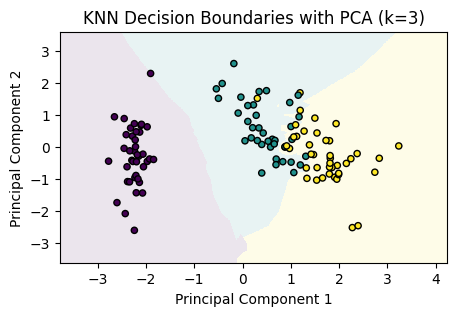

In [12]:
# Plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5, 3))
plt.pcolormesh(xx, yy, Z, alpha=0.1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'KNN Decision Boundaries with PCA (k={k})')
plt.show()